# **Descargar archivo hogares 2018 🔽📖🏠**

In [7]:
import gdown

# Enlace directo de Google Drive
file_id = "1bg5lMJLP_oJow0kIJrtVXpochSwyX1WL"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Descargar el archivo a la carpeta local
output = "hogares_total_limpios_descargado.csv"
gdown.download(download_url, output, quiet=False)



Downloading...
From: https://drive.google.com/uc?export=download&id=1bg5lMJLP_oJow0kIJrtVXpochSwyX1WL
To: /content/hogares_total_limpios_descargado.csv
100%|██████████| 15.2M/15.2M [00:00<00:00, 79.2MB/s]


'hogares_total_limpios_descargado.csv'

# **Descargar  archivo icfes 2018 🔽📖📊**

In [2]:
import gdown

# Enlace directo de Google Drive
file_id = "1hPuqbMjfbcVxay2pMGlcmjWqdt0P6_OU"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Descargar el archivo a la carpeta local
output = "icfes_2018_descargado.csv"
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1hPuqbMjfbcVxay2pMGlcmjWqdt0P6_OU
To: /content/icfes_2018_descargado.csv
100%|██████████| 14.0M/14.0M [00:00<00:00, 73.3MB/s]


'icfes_2018_descargado.csv'

# Librerias 📚

In [ ]:
!pip install pandas scikit-learn matplotlib


# K Means

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar los archivos CSV
hogares = pd.read_csv('hogares_total_limpios_descargado.csv')
icfes = pd.read_csv('icfes_2018_descargado.csv')

# Seleccionar las columnas de interés de cada dataset
hogares_selected = hogares[['personas', 'empleo_formal', 'desempleo_larga_duracion', 'acueducto', 'aseguramiento_salud', 'ipm']]
icfes_selected = icfes[['PUNT_MATEMATICAS', 'PUNT_INGLES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_GLOBAL']]

# Combinar los datasets, asegurando que tengan el mismo número de filas
# Aquí se realiza una concatenación horizontal (columna por columna)
combined_data = pd.concat([hogares_selected, icfes_selected], axis=1).dropna()

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)


In [9]:
# Definir el modelo K-means con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=0)

# Entrenar el modelo con los datos estandarizados
kmeans.fit(scaled_data)

# Obtener los clústeres y asignarlos al DataFrame
combined_data['cluster'] = kmeans.labels_

# Mostrar los primeros registros con sus clústeres asignados
print(combined_data.head())


   personas  empleo_formal  desempleo_larga_duracion  acueducto  \
0       2.0            1.0                       0.0        0.0   
1       3.0            1.0                       1.0        0.0   
2       3.0            1.0                       0.0        0.0   
3       2.0            0.0                       0.0        0.0   
4       1.0            1.0                       0.0        0.0   

   aseguramiento_salud   ipm  PUNT_MATEMATICAS  PUNT_INGLES  \
0                  0.0  10.0              34.0         52.0   
1                  0.0  20.0              34.0         52.0   
2                  0.0  20.0              47.0         47.0   
3                  0.0   0.0              79.0         87.0   
4                  0.0  10.0              79.0         87.0   

   PUNT_SOCIALES_CIUDADANAS  PUNT_C_NATURALES  PUNT_GLOBAL  cluster  
0                      32.0              41.0        194.0        1  
1                      32.0              41.0        194.0        1  
2       

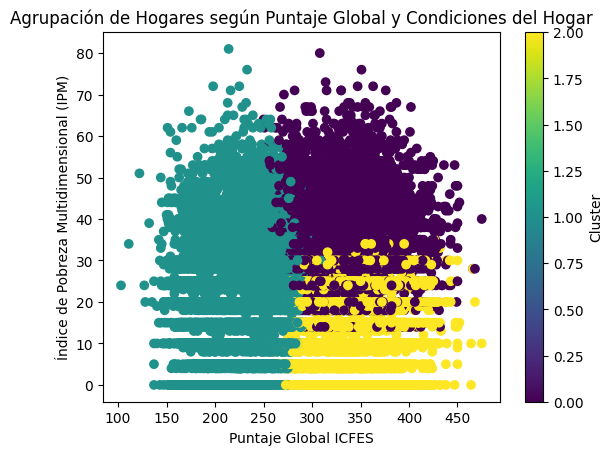

In [10]:
# Crear un gráfico de dispersión utilizando dos variables para visualizar los clústeres
plt.scatter(combined_data['PUNT_GLOBAL'], combined_data['ipm'], c=combined_data['cluster'], cmap='viridis')
plt.xlabel('Puntaje Global ICFES')
plt.ylabel('Índice de Pobreza Multidimensional (IPM)')
plt.title('Agrupación de Hogares según Puntaje Global y Condiciones del Hogar')
plt.colorbar(label='Cluster')
plt.show()


# Dataframe Icfes 2018 🐼

In [11]:

icfes = pd.read_csv('icfes_2018_descargado.csv')
icfes

,_id,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,66f37fe8b0dce59e6c25c82c,20181,CC,SB11201810028234,URBANO,N,B,ACADÉMICO,376001031007,376001031007,...,Si,Si,Si,A1,52,34,32,41,44,194
1,66f37fe8b0dce59e6c25c82d,20181,CC,SB11201810028234,URBANO,N,B,ACADÉMICO,376001031007,376001031007,...,Si,Si,Si,A1,52,34,32,41,44,194
2,66f37fe8b0dce59e6c25ca5c,20181,CC,SB11201810047396,URBANO,N,A,NaN,373001010485,373001010485,...,Si,Si,Si,A-,47,47,46,52,58,252
3,66f37fe8b0dce59e6c25cb85,20181,TI,SB11201810016997,URBANO,S,B,ACADÉMICO,311848000324,311848000324,...,Si,Si,Si,B+,87,79,74,77,71,381
4,66f37fe8b0dce59e6c25cb86,20181,TI,SB11201810016997,URBANO,S,B,ACADÉMICO,311848000324,311848000324,...,Si,Si,Si,B+,87,79,74,77,71,381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32343,66f382f7b0dce59e6c81d9a2,20181,TI,SB11201810004242,URBANO,N,B,ACADÉMICO,376001000128,376001000128,...,Si,Si,Si,A2,67,62,62,64,70,323
32344,66f382f7b0dce59e6c81d9a3,20181,TI,SB11201810004242,URBANO,N,B,ACADÉMICO,376001000128,376001000128,...,Si,Si,Si,A2,67,62,62,64,70,323
32345,66f382f7b0dce59e6c81da1e,20181,TI,SB11201810021880,URBANO,N,A,ACADÉMICO,105001003425,105001003425,...,Si,NaN,Si,A-,26,24,39,36,41,172
32346,66f382f7b0dce59e6c81e20d,20181,TI,SB11201810004880,URBANO,N,B,ACADÉMICO,376001000128,376001000128,...,Si,Si,Si,A1,52,46,49,58,55,260


# Dataframe Hogares 2018 🐼

In [12]:
hogares = pd.read_csv('hogares_total_limpios_descargado.csv')
hogares

,_id,PERIODO,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,P5010,P8526,P8530,fex_c,REGION,...,trabajo_infantil,atencion_integral,inasistencia_escolar,rezago_escolar,alfabetismo,logro_educativo,hacinamiento,ipm,pobre,fexp
0,66e6306941f02c2e7cb63b0e,2018.0,7000000.0,1.0,1.0,2.0,1.0,1.0,384.328169,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,768.656339
1,66e6306941f02c2e7cb63b0f,2018.0,7000001.0,1.0,1.0,2.0,1.0,1.0,297.172456,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,891.517368
2,66e6306941f02c2e7cb63b10,2018.0,7000002.0,1.0,1.0,2.0,1.0,1.0,274.640130,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,0.0,823.920392
3,66e6306941f02c2e7cb63b11,2018.0,7000003.0,1.0,1.0,2.0,1.0,1.0,125.253015,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.506030
4,66e6306941f02c2e7cb63b12,2018.0,7000004.0,1.0,1.0,1.0,1.0,1.0,195.420015,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,195.420015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89517,66e6307241f02c2e7cb798bb,2018.0,7119770.0,1.0,1.0,1.0,2.0,2.0,3.073809,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,6.147617
89518,66e6307241f02c2e7cb798bc,2018.0,7119771.0,1.0,1.0,2.0,5.0,6.0,4.884738,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,19.538951
89519,66e6307241f02c2e7cb798bd,2018.0,7119772.0,1.0,1.0,2.0,2.0,2.0,3.073809,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,0.0,6.147617
89520,66e6307241f02c2e7cb798be,2018.0,7119773.0,1.0,1.0,3.0,2.0,6.0,31.139408,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,0.0,124.557631
